### <font color='green'>IMPORT LIBRARIES</font> 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np 
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from pathlib import Path
from sklearn.metrics import mean_absolute_error
import joblib
from sklearn.metrics import mean_squared_error
forest_reg=RandomForestRegressor()
from sklearn import svm
import os
import seaborn as sns
from sklearn.linear_model import LinearRegression


### <font color='green'>READ THE FILES</font> 

In [1]:
diversity_school=pd.read_csv(r"diversity_school.csv") #less important
historical_tuition=pd.read_csv("historical_tuition.csv") #less important
salary_potential=pd.read_csv("salary_potential.csv")
tuition_cost=pd.read_csv("tuition_cost.csv")
tuition_income=pd.read_csv("tuition_income.csv") #less important

### <font color='green'>MERGE THE DATABASES</font> 

In [2]:
merged_salary_potential_tuition_cost=pd.merge(salary_potential,tuition_cost,on='name')
merged_salary_potential_tuition_cost

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,1,Auburn University,Alabama,54400,104500,51.0,31,Alabama,AL,Public,4 Year,13332.0,11276,24608,30524,43856
1,2,University of Alabama in Huntsville,Alabama,57500,103900,59.0,45,Alabama,AL,Public,4 Year,10094.0,10714,20808,22362,32456
2,4,Tuskegee University,Alabama,54500,93500,61.0,30,Alabama,AL,Private,4 Year,9650.0,22170,31820,22170,31820
3,5,Samford University,Alabama,48400,90500,52.0,3,Alabama,AL,Private,4 Year,10550.0,31650,42200,31650,42200
4,6,Spring Hill College,Alabama,46600,89100,53.0,12,Alabama,AL,Private,4 Year,13462.0,39464,52926,39464,52926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,20,Wisconsin Lutheran College,Wisconsin,46200,82500,45.0,10,Wisconsin,WI,Private,4 Year,10190.0,29725,39915,29725,39915
724,22,Viterbo University,Wisconsin,46800,81900,62.0,3,Wisconsin,WI,Private,4 Year,9060.0,27970,37030,27970,37030
725,24,University of Wisconsin-Parkside,Wisconsin,46000,81400,47.0,17,Wisconsin,WI,Public,4 Year,8026.0,7529,15555,15518,23544
726,25,University of Wisconsin-River Falls,Wisconsin,47100,81300,52.0,14,Wisconsin,WI,Public,4 Year,6513.0,7862,14375,15435,21948


### <font color='green'>FEATURE EXTRACTION</font> 

In [3]:
merged_salary_potential_tuition_cost['degree_length'].value_counts()
merged_salary_potential_tuition_cost[merged_salary_potential_tuition_cost['degree_length']=='2 Year']
corr_matr=merged_salary_potential_tuition_cost.corr()
corr_matr['mid_career_pay'].sort_values(ascending=False)

mid_career_pay               1.000000
early_career_pay             0.984745
out_of_state_total           0.638923
out_of_state_tuition         0.634013
room_and_board               0.631316
stem_percent                 0.622402
in_state_total               0.543443
in_state_tuition             0.513400
make_world_better_percent   -0.314307
rank                        -0.530437
Name: mid_career_pay, dtype: float64

array([[<AxesSubplot:xlabel='mid_career_pay', ylabel='mid_career_pay'>,
        <AxesSubplot:xlabel='early_career_pay', ylabel='mid_career_pay'>,
        <AxesSubplot:xlabel='out_of_state_total', ylabel='mid_career_pay'>,
        <AxesSubplot:xlabel='out_of_state_tuition', ylabel='mid_career_pay'>,
        <AxesSubplot:xlabel='room_and_board', ylabel='mid_career_pay'>,
        <AxesSubplot:xlabel='stem_percent', ylabel='mid_career_pay'>,
        <AxesSubplot:xlabel='in_state_total', ylabel='mid_career_pay'>,
        <AxesSubplot:xlabel='in_state_tuition', ylabel='mid_career_pay'>,
        <AxesSubplot:xlabel='make_world_better_percent', ylabel='mid_career_pay'>],
       [<AxesSubplot:xlabel='mid_career_pay', ylabel='early_career_pay'>,
        <AxesSubplot:xlabel='early_career_pay', ylabel='early_career_pay'>,
        <AxesSubplot:xlabel='out_of_state_total', ylabel='early_career_pay'>,
        <AxesSubplot:xlabel='out_of_state_tuition', ylabel='early_career_pay'>,
        <AxesSubplot

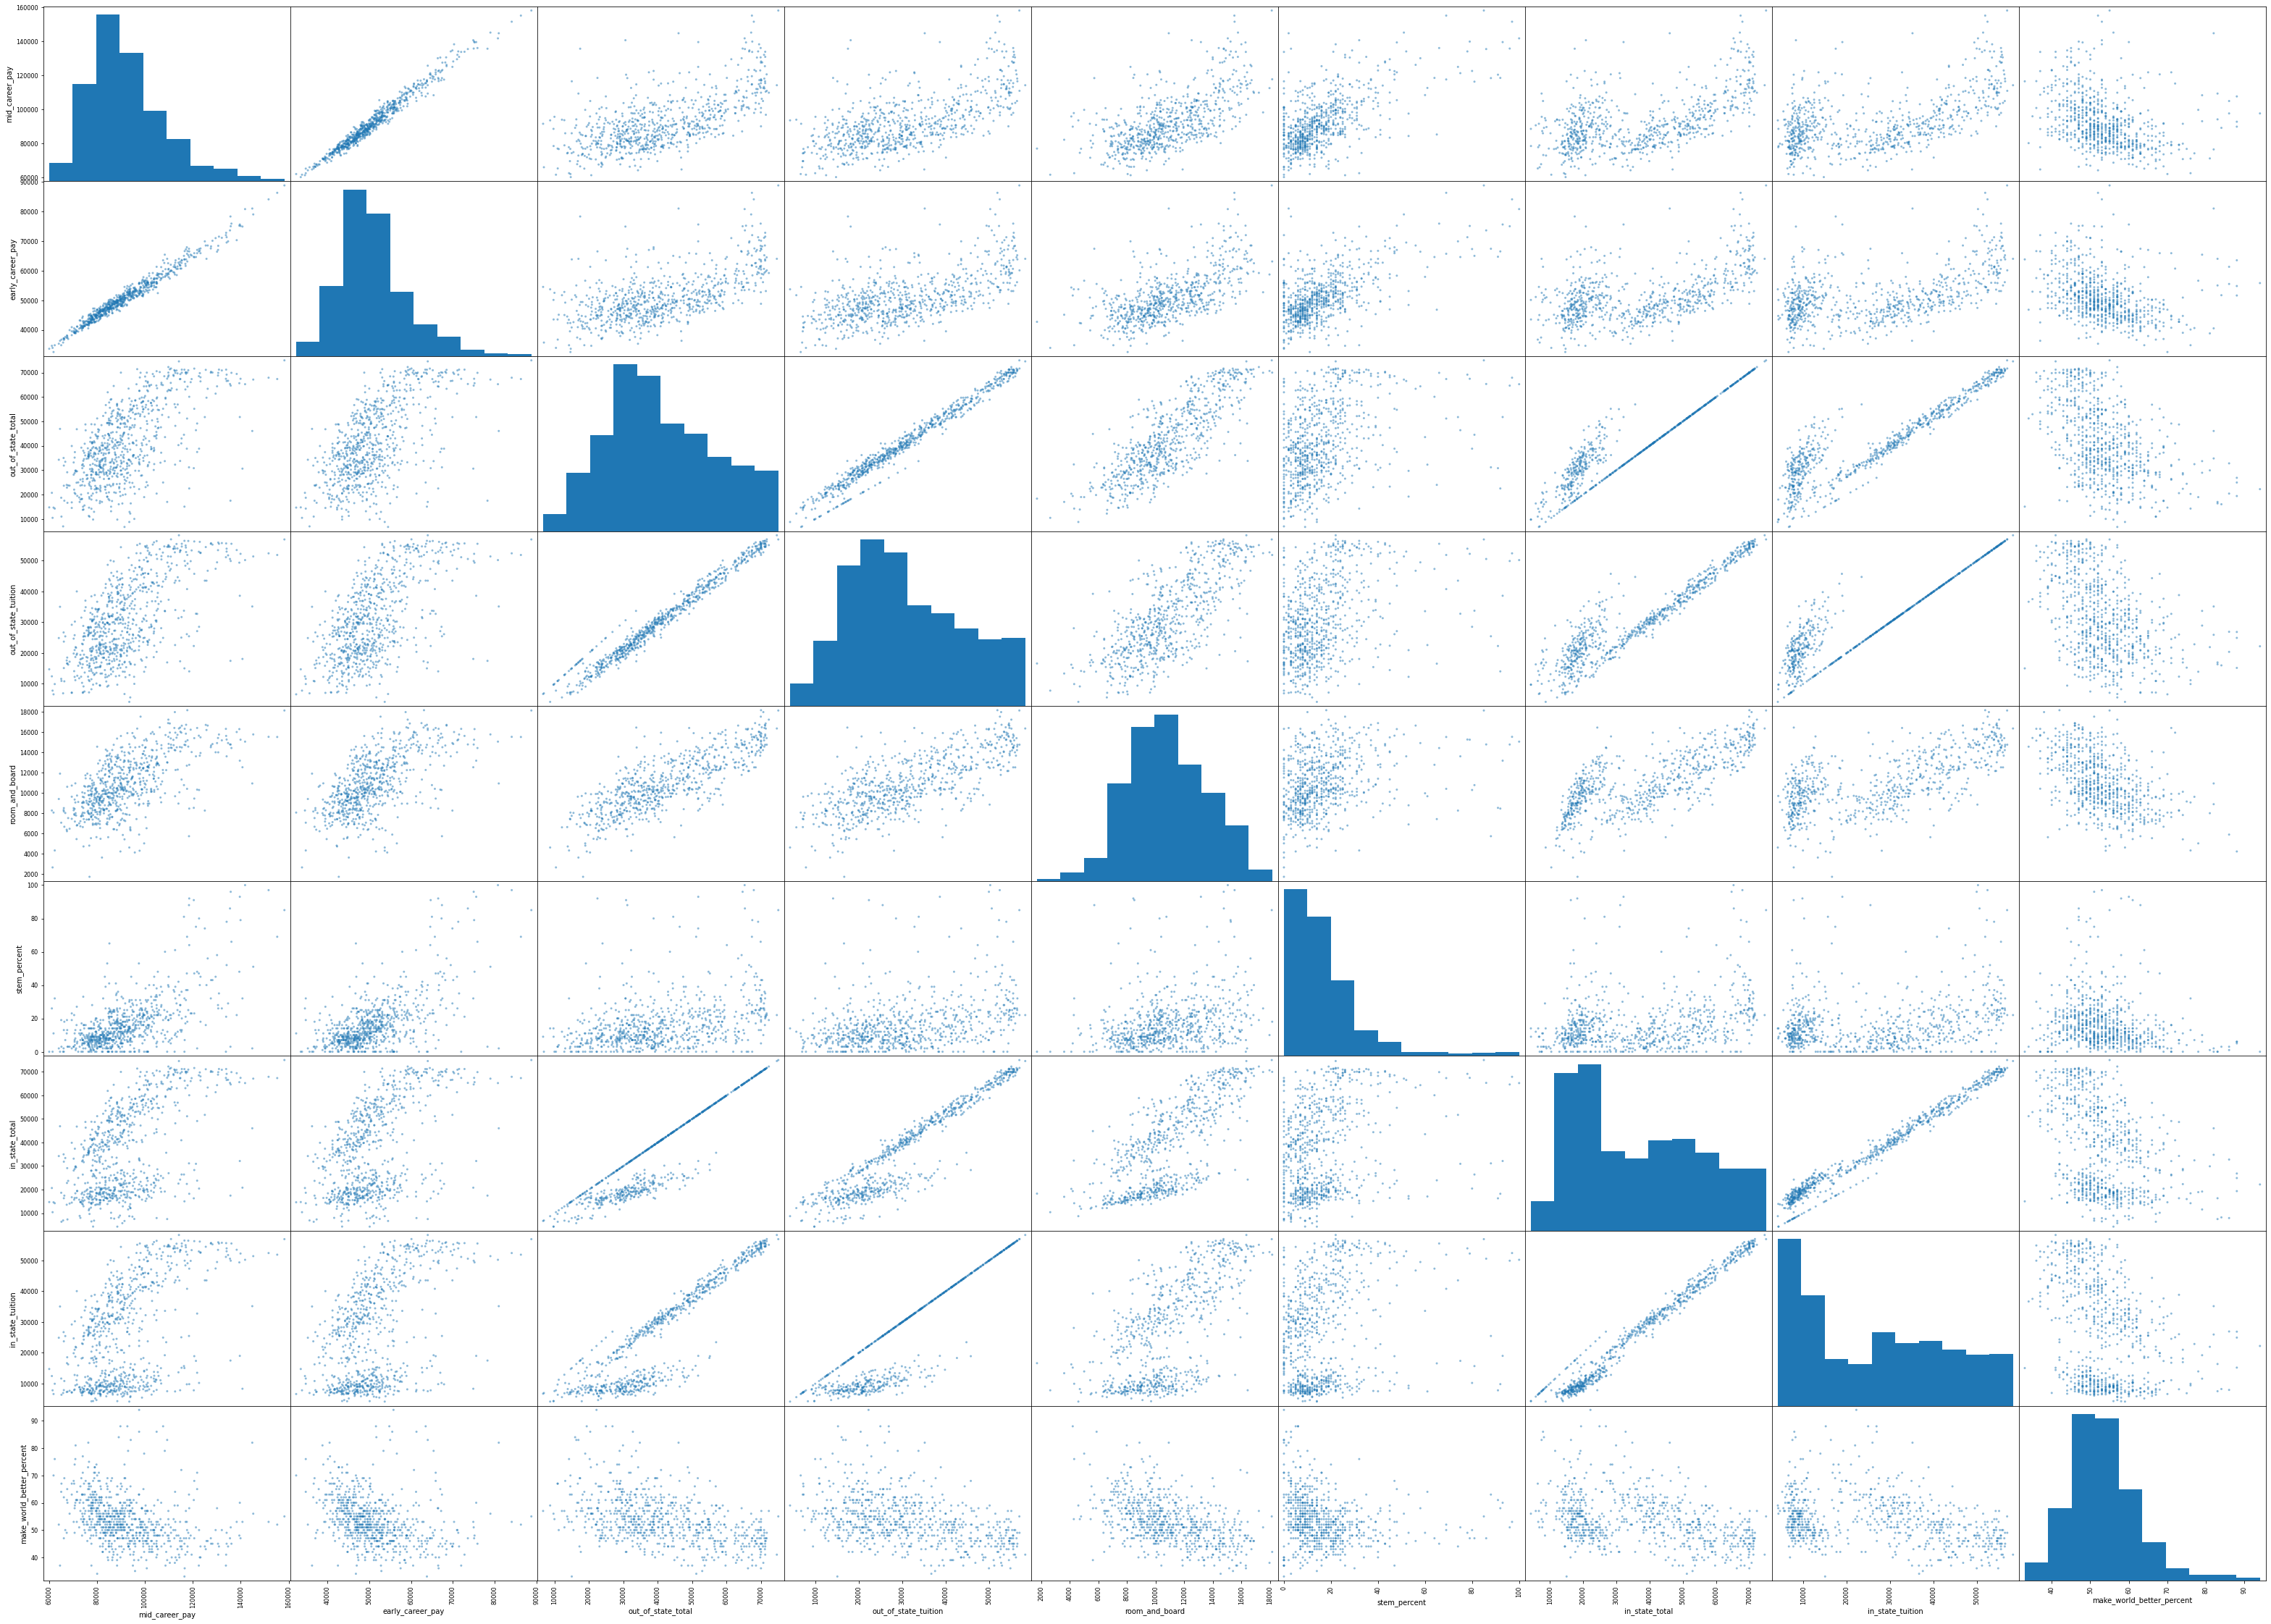

In [4]:
merged_salary_potential_tuition_cost.drop(['rank','state_code','state','degree_length'],axis=1,inplace=True)
scatter_matrix(merged_salary_potential_tuition_cost[['mid_career_pay','early_career_pay','out_of_state_total','out_of_state_tuition','room_and_board',
                                                    'stem_percent','in_state_total','in_state_tuition','make_world_better_percent']],figsize=(55,40))

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2880x2160 with 0 Axes>

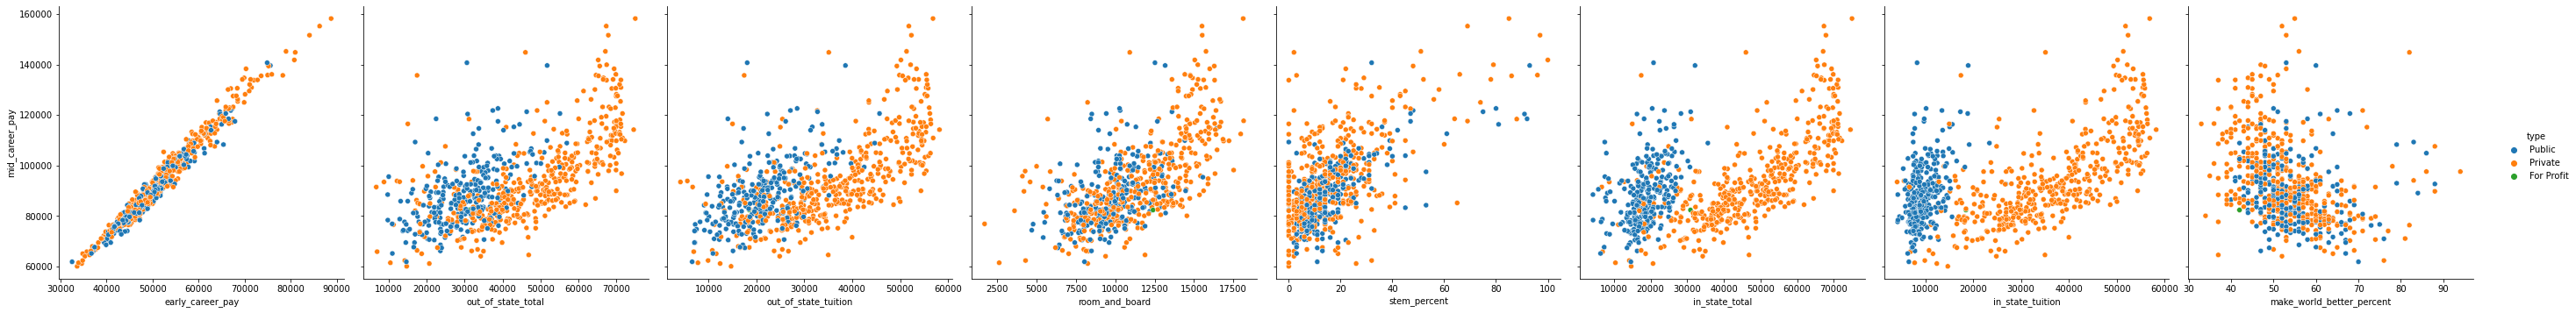

<Figure size 2880x2160 with 0 Axes>

In [5]:

numerical_data_and_type=merged_salary_potential_tuition_cost[['mid_career_pay','early_career_pay','out_of_state_total','out_of_state_tuition','room_and_board',
                                                    'stem_percent','in_state_total','in_state_tuition','make_world_better_percent','type']]

sn.pairplot(numerical_data_and_type,y_vars=['mid_career_pay'], x_vars=['early_career_pay','out_of_state_total','out_of_state_tuition','room_and_board',
                                                    'stem_percent','in_state_total','in_state_tuition','make_world_better_percent']
            , hue='type',size=5) #use x_vars, y_vars to plot only one column
#height=10, aspect=0.2
plt.figure(figsize=(40,30))

In [9]:
merged_salary_potential_tuition_cost.drop(['name','state_name','type',],axis=1,inplace=True)


### <font color='green'>HANDLING CATEGORICAL FEATURES</font> 

In [6]:
#separate 2 datasets
cat_features=merged_salary_potential_tuition_cost['type']
cat_features
cat_features_1hot = pd.get_dummies(cat_features, columns=['type'])#, prefix = ['type'])
cat_features

0       Public
1       Public
2      Private
3      Private
4      Private
        ...   
723    Private
724    Private
725     Public
726     Public
727     Public
Name: type, Length: 728, dtype: object

In [8]:
cat_encoder=OneHotEncoder()
cat_features_1hot=cat_encoder.fit_transform(cat_features.values.reshape(-1, 1))#.to_array()

cat_features_1hot

<728x3 sparse matrix of type '<class 'numpy.float64'>'
	with 728 stored elements in Compressed Sparse Row format>

### <font color='green'>HANDLING MISSING VALUES</font> 

In [10]:

imputer=IterativeImputer(estimator=BayesianRidge())
num_features1=imputer.fit_transform(merged_salary_potential_tuition_cost) #THE OUTPUT IS AN ARRAY!
num_features1=pd.DataFrame(num_features1,columns=merged_salary_potential_tuition_cost.columns,
                         index=merged_salary_potential_tuition_cost.index)

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [12]:
dataset=pd.concat([num_features1,pd.DataFrame(cat_features_1hot)],axis=1)
train_set, test_set=train_test_split(dataset, test_size=0.2, random_state=42)

In [13]:
 #remember axis=1
train_set_target=train_set.loc[:,'mid_career_pay']
train_set=train_set.drop('mid_career_pay', axis=1)
train_set

,early_career_pay,make_world_better_percent,stem_percent,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,0
433,48700.0,55.0,9.0,12738.0,12051.0,24789.0,21573.0,34311.0,"(0, 2)\t1.0"
136,51700.0,57.0,12.0,6586.0,5560.0,12146.0,5560.0,12146.0,"(0, 1)\t1.0"
350,51200.0,47.0,22.0,9910.0,45400.0,55310.0,45400.0,55310.0,"(0, 1)\t1.0"
6,47700.0,56.0,17.0,7620.0,9870.0,17490.0,19740.0,27360.0,"(0, 2)\t1.0"
318,62700.0,53.0,39.0,14190.0,33950.0,48140.0,33950.0,48140.0,"(0, 1)\t1.0"
...,...,...,...,...,...,...,...,...,...
71,46800.0,70.0,2.0,11846.0,31866.0,43712.0,31866.0,43712.0,"(0, 1)\t1.0"
106,49200.0,52.0,25.0,12588.0,44540.0,57128.0,44540.0,57128.0,"(0, 1)\t1.0"
270,59500.0,50.0,23.0,15224.0,53794.0,69018.0,53794.0,69018.0,"(0, 1)\t1.0"
435,64700.0,61.0,91.0,8510.0,7770.0,16280.0,22268.0,30778.0,"(0, 2)\t1.0"


In [14]:
 #remember axis=1
test_set_target=test_set.loc[:,'mid_career_pay']
test_set=test_set.drop('mid_career_pay', axis=1)
test_set

,early_career_pay,make_world_better_percent,stem_percent,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,0
39,45000.0,54.0,7.0,7870.0,9068.0,16938.0,15848.0,23718.0,"(0, 2)\t1.0"
335,50800.0,53.0,21.0,10427.0,13347.0,23774.0,28241.0,38668.0,"(0, 2)\t1.0"
326,69900.0,44.0,74.0,8240.0,43490.0,51730.0,43490.0,51730.0,"(0, 1)\t1.0"
512,42200.0,55.0,11.0,4780.0,7036.0,11816.0,14153.0,18933.0,"(0, 2)\t1.0"
548,57300.0,41.0,6.0,14840.0,44973.0,59813.0,44973.0,59813.0,"(0, 1)\t1.0"
...,...,...,...,...,...,...,...,...,...
135,43300.0,59.0,10.0,9880.0,7200.0,17080.0,20682.0,30562.0,"(0, 2)\t1.0"
174,48700.0,59.0,16.0,9614.0,34114.0,43728.0,34114.0,43728.0,"(0, 1)\t1.0"
599,47500.0,67.0,9.0,6940.0,21950.0,28890.0,21950.0,28890.0,"(0, 1)\t1.0"
331,51600.0,52.0,31.0,9756.0,48516.0,58272.0,48516.0,58272.0,"(0, 1)\t1.0"


### <font color='green'>FEATURE SCALING</font> 

In [15]:
scaler=StandardScaler()
train_set_stand=scaler.fit_transform(train_set.iloc[:,:7])
train_set_features=pd.DataFrame(train_set_stand,columns=train_set.iloc[:,:7].columns, index=train_set.iloc[:,:7].index )
train_set=pd.concat([train_set_features,train_set_target],axis=1)

In [16]:
test_set_stand=scaler.fit_transform(test_set.iloc[:,:7])
test_set_features=pd.DataFrame(test_set_stand,columns=test_set.iloc[:,:7].columns, index=test_set.iloc[:,:7].index )
test_set=pd.concat([test_set_features,test_set_target],axis=1)

In [17]:
train_set_features

,early_career_pay,make_world_better_percent,stem_percent,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition
433,-0.282094,0.137447,-0.503802,0.596758,-0.852674,-0.615145,-0.690060
136,0.074997,0.364375,-0.309149,-0.799923,-1.246863,-1.283011,-1.911360
350,0.015482,-0.770264,0.339695,-0.045279,1.172563,0.997125,1.127208
6,-0.401124,0.250911,0.015273,-0.565175,-0.985123,-1.000714,-0.829862
318,1.384332,-0.089481,1.442730,0.926404,0.477221,0.618370,0.253924
...,...,...,...,...,...,...,...
71,-0.508252,1.839405,-0.957993,0.394249,0.350662,0.384461,0.094979
106,-0.222579,-0.202945,0.534349,0.562704,1.120336,1.093161,1.061616
270,1.003434,-0.429873,0.404580,1.161152,1.682318,1.721249,1.767412
435,1.622392,0.818230,4.816719,-0.363120,-1.112653,-1.064632,-0.637053


### <font color='green'>TRAINING AND PREDICTION</font> 

In [98]:

#train_set_features,train_set_target,test_set_features,test_set_target: train and test sets, target and features sets
#model: model used (for instance, forest_reg, lin_reg, clf etc...)
#file name= name of the file if path=False (or directory with name if path ='directory_name/')
#second name = if there are other particular parameters that have been changed or other characteristics
#that distinguish the model from the similar ones
#fold: name of the path. If you want to save the file in the same fold of the notebook, put False 
def func_machine_learning_model(train_set_features,train_set_target,test_set_features,
                                test_set_target,model,file_name,second_name,path):   
    model.fit(train_set_features,train_set_target)    
    train_predictions=model.predict(train_set_features) #predictions on train set
    #rmse train
    mse_train=mean_squared_error(train_set_target,train_predictions)
    rmse_train=np.sqrt(mse_train)
    #mape train
    mape_train_list=[]
    for y_true, y_pred in zip(train_set_target,train_predictions):
        mape_train=np.abs((y_true - y_pred) / y_true)
        mape_train_list.append(mape_train)
    mape_train=np.mean(mape_train_list)*100
    test_predictions=model.predict(test_set_features) #predictions on test set  
    #mae train
    mae_train=mean_absolute_error(train_set_target,train_predictions)
    #-----------------------------------------------------------------------
    #rmse test
    mse_test=mean_squared_error(test_set_target,test_predictions)
    rmse_test=np.sqrt(mse_test)   
    #mape test
    mape_test_list=[]
    for y_true, y_pred in zip(test_set_target,test_predictions):
        mape_test=np.abs((y_true - y_pred) / y_true)
        mape_test_list.append(mape_test)
    mape_test=np.mean(mape_test_list)*100
    list_model= str(model).split('(')
    #mae test
    mae_test=mean_absolute_error(test_set_target,test_predictions)
    #----------------------------------------------------------------------
    
    if path ==False:      
        #save the results on a .txt file
        file1 = open(f"results_{list_model[0]}_{file_name}_{second_name}.txt","w+")  
        file1.write(f'rmse train:{rmse_train}, rmse test:{rmse_test} \n mae train:{mae_train}, mae test:{mae_test} \n mape train:{mape_train}, mape test:{mape_test}')
        file1.close() 

        # save the model on a disk
        filename = f'{list_model[0]}_{file_name}_{second_name}.sav'
        joblib.dump(model, filename)
    else:
        path_new = os.path.join(path, 'results/')
        os.mkdir(path_new)
        file1 = open(f"{path_new}{list_model[0]}_{file_name}_{second_name}.txt","w+")  
        file1.write(f'rmse train:{rmse_train}, rmse test:{rmse_test} \n mae train:{mae_train}, mae test:{mae_test} \n mape train:{mape_train}, mape test:{mape_test}')
        file1.close() 

        # save the model on a disk
        filename = f'{path}{list_model[0]}_{file_name}_{second_name}.sav'
        joblib.dump(model, filename)
    #print(set(zip(test_predictions,test_set_target))) activate if you want to see all the predicted and actual values
    print(f'rmse train:{rmse_train}, rmse test:{rmse_test} \n')
    print(f'mae train:{mae_train}, mae test:{mae_test}')
    print(f'mape train:{mape_train}, mape test:{mape_test}')
    
    
    #########PLOTS
    
    fig, ax = plt.subplots(6,1,figsize=(10,25))
    
    
    ax[0].scatter(train_set_target,train_predictions)
    ax[0].plot([60000,160000],[60000,160000],color='red')
    #ax[0].fill_between(train_set_target,train_predictions-np.percentile(train_predictions, 0.5),train_predictions+np.percentile(train_predictions, 0.5), color=grays, alpha = alpha, label=f"{quantiles}")
    ax[0].set_xlabel('Actual Value')
    ax[0].set_ylabel('Predicted Value')
    ax[0].set_title('Train Dataset:Actual vs Predicted')
    
    ax[1].scatter(test_set_target,test_predictions)
    ax[1].plot([60000,160000],[60000,160000],color='red')
    #ax[0].fill_between(test_set_target,test_predictions-np.percentile(test_predictions, 0.5),test_predictions+np.percentile(test_predictions, 0.5), color=grays, alpha = alpha, label=f"{quantiles}")
    test_predictions
    ax[1].set_title('Test Dataset: Actual vs Predicted')
    ax[1].set_xlabel('Actual Value')
    ax[1].set_ylabel('Predicted Value')
    
    
    ax[2].scatter(train_set_target,train_set_target-train_predictions,color='rebeccapurple')  
    ax[2].plot([60000,160000],[0,0],color='red')
    ax[2].set_title('Residual Train Dataset Plot')
    ax[2].set_ylim(-65000,65000)   
    ax[2].set_ylabel('Residuals')
    ax[2].set_xlabel('Actual Values')
    
    ax[3].scatter(test_set_target,test_set_target-test_predictions,color='rebeccapurple')
    ax[3].plot([60000,160000],[0,0],color='red')
    ax[3].set_title('Residual Test Dataset Plot')
    ax[3].set_ylim(-65000,65000)    
    ax[3].set_ylabel('Residuals')
    ax[3].set_xlabel('Actual Values')
    
    
    ax[4].hist(train_set_target-train_predictions,bins=28,color='orange')
    ax[4].set_title('Residual Train Dataset Histogram') 
    ax[4].plot([0,0],[0,80],color='red')
    ax[4].set_xlim(-65000,65000)
    ax[4].set_xlabel('Residuals')
    ax[4].set_ylabel('Frequency')
    
    ax[5].hist(test_set_target-test_predictions,bins=28,color='orange')
    ax[5].set_title('Residual Test Dataset Histogram')  
    ax[5].plot([0,0],[0,17],color='red')
    ax[5].set_xlim(-65000,65000)
    ax[5].set_xlabel('Residuals')
    ax[5].set_ylabel('Frequency')
    
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    
    
    return rmse_train, rmse_test, mae_train, mae_test, mape_train, mape_test

rmse train:1023.0900409830813, rmse test:3178.13125714959 

mae train:791.0463917525773, mae test:2440.5479452054797
mape train:0.84685756385392, mape test:2.6170269447514656


(1023.0900409830813,
 3178.13125714959,
 791.0463917525773,
 2440.5479452054797,
 0.84685756385392,
 2.6170269447514656)

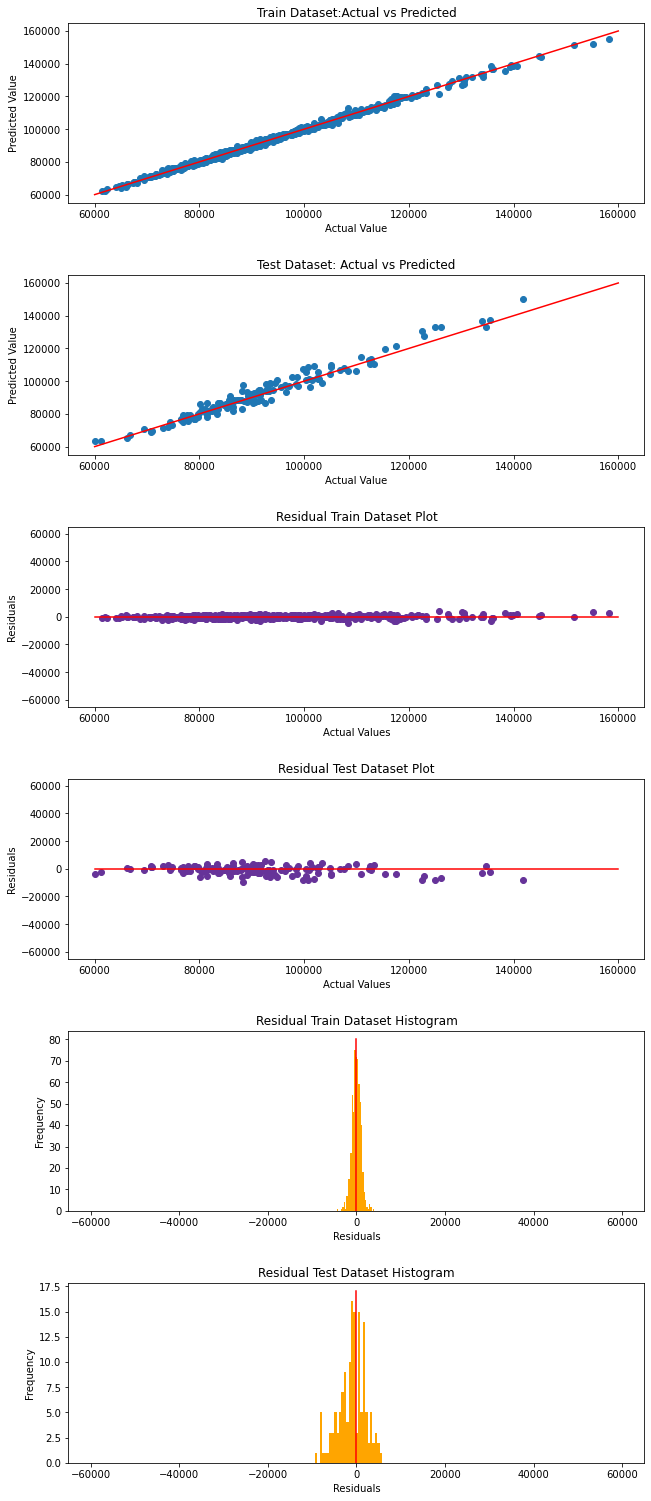

In [99]:
func_machine_learning_model(train_set_features,train_set_target,test_set_features,test_set_target,forest_reg,'second_model','without_make_world_better',path=False)

### <font color='green'>FINAL MODEL</font> 

In [79]:
forest_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}